## Gradient Descent 

This notebook provides hand-coded versions of gradient descent and its stochastic variation.

#### Keep the versions below, as they are already tested with this notebook

In [1]:
# Ensure installation of specific libaries
!pip install celluloid==0.2.0
!pip install d2l==0.14.3
!pip install IPython==7.16.1
!pip install numpy==1.19.5
!pip install matplotlib==3.3.4
!pip install torch==1.8.1+cu101
!pip install torchvision==0.9.1+cu101
!pip install scikit-learn==0.24.1
!pip install seaborn==0.11.1

In [2]:
import numpy as np

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib inline

import torch

We will explore Gradient Descent to find the minimum of a two dimensional test function: 

$f(x, y) = x^2 + 2y^2$

It is easy to realize that this function reaches its minimum at $(x, y) = (0, 0)$.

In [3]:
def TestFct(v):
    x = v[0]
    y = v[1]
    return x ** 2 + 2 * y ** 2


def TestFct_xy(x, y):
    return x ** 2 + 2 * y ** 2

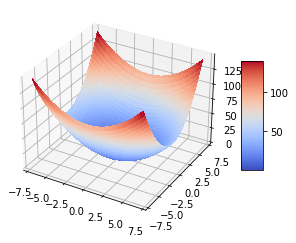

In [4]:
fig = plt.figure()
ax = fig.gca(projection="3d")

# Make data.
X = np.arange(-7, 7, 0.1)
Y = np.arange(-7, 7, 0.1)
X, Y = np.meshgrid(X, Y)
Z = TestFct_xy(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Below we can see the contours of the function and the global minimum (orange point)

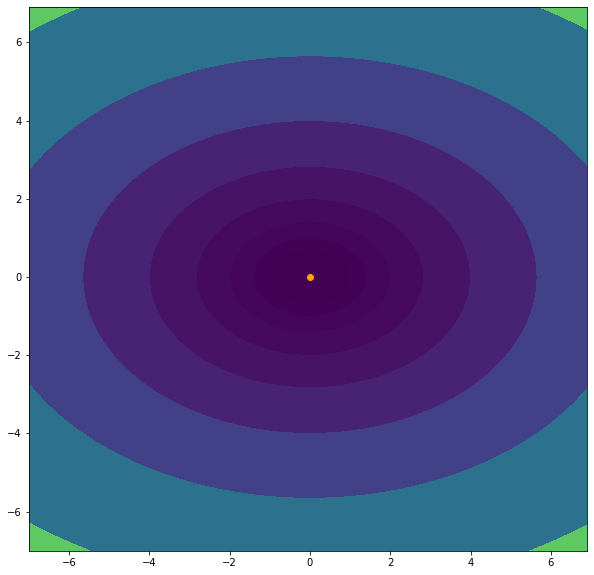

In [5]:
# Function
plt.figure(figsize=(10, 10))
plt.contourf(X, Y, Z, levels=[0, 1, 2, 4, 8, 16, 32, 64, 128, 256])  # ,512,1024,2048])
plt.scatter([0], [0], c="Orange")
plt.show()

## Gradient Descent

### Learning rate: too small

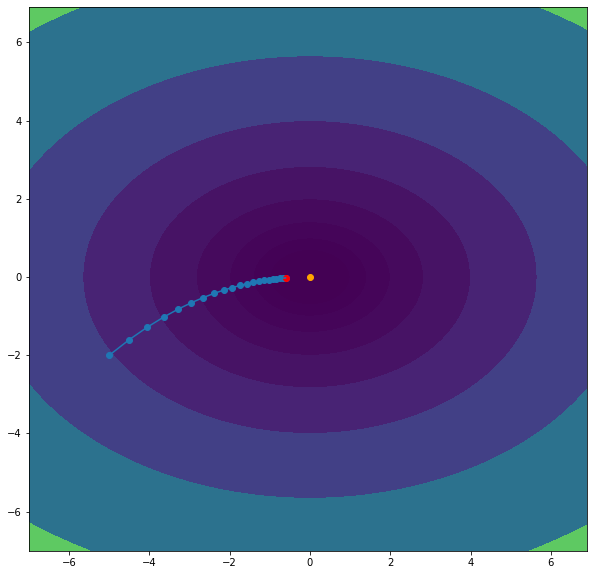

In [6]:
# Gradient Descent

# Learning rate too small
lr = 0.05

# Create an array and require that its grad is attached
p = torch.tensor([-5.0, -2.0], requires_grad=True)

# Store the coordinates to plot later
x_coords = [p[0].item()]
y_coords = [p[1].item()]

# Run GD for 20 iterations, compute loss, update p with gradient times learning rate
for i in range(20):
    loss = TestFct(p)
    loss.backward()
    with torch.no_grad():
        p -= lr * p.grad
        p.grad.zero_()
    x_coords.append(p[0].item())
    y_coords.append(p[1].item())

plt.figure(figsize=(10, 10))
plt.contourf(X, Y, Z, levels=[0, 1, 2, 4, 8, 16, 32, 64, 128, 256])  # ,512,1024,2048])
plt.plot(x_coords, y_coords)
plt.scatter(x_coords, y_coords)
plt.scatter([0], [0], c="Orange")
plt.scatter(x_coords[-1], y_coords[-1], c="Red")  # last update

plt.show()

### Learning rate: too large

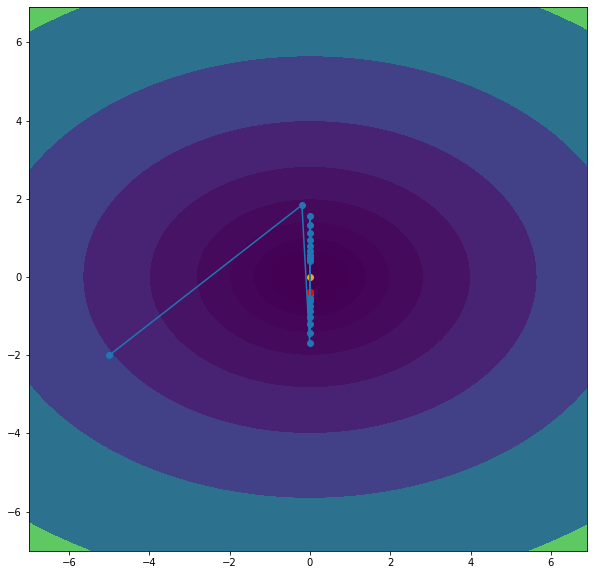

In [7]:
# Learning rate too large
lr = 0.48

# Create an array and require that its grad is attached
p = torch.tensor([-5.0, -2.0], requires_grad=True)

# Store the coordinates to plot later
x_coords = [p[0].item()]
y_coords = [p[1].item()]

# Run GD for 20 iterations, compute loss, update p with gradient times learning rate
for i in range(20):
    loss = TestFct(p)
    loss.backward()
    with torch.no_grad():
        p -= lr * p.grad
        p.grad.zero_()
    x_coords.append(p[0].item())
    y_coords.append(p[1].item())

plt.figure(figsize=(10, 10))
plt.contourf(X, Y, Z, levels=[0, 1, 2, 4, 8, 16, 32, 64, 128, 256])  # ,512,1024,2048])
plt.plot(x_coords, y_coords)
plt.scatter(x_coords, y_coords)
plt.scatter([0], [0], c="Orange")
plt.scatter(x_coords[-1], y_coords[-1], c="Red")  # last update

plt.show()

### Learning rate: just right

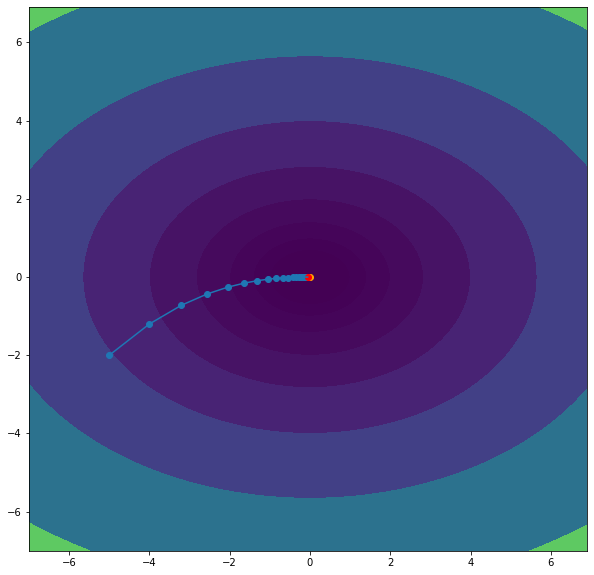

In [8]:
# Learning rate just right
lr = 0.1

# Create an array and require that its grad is attached
p = torch.tensor([-5.0, -2.0], requires_grad=True)

# Store the coordinates to plot later
x_coords = [p[0].item()]
y_coords = [p[1].item()]

# Run GD for 20 iterations, compute loss, update p with gradient times learning rate
for i in range(20):
    loss = TestFct(p)
    loss.backward()
    with torch.no_grad():
        p -= lr * p.grad
        p.grad.zero_()
    x_coords.append(p[0].item())
    y_coords.append(p[1].item())

plt.figure(figsize=(10, 10))
plt.contourf(X, Y, Z, levels=[0, 1, 2, 4, 8, 16, 32, 64, 128, 256])  # ,512,1024,2048])
plt.plot(x_coords, y_coords)
plt.scatter(x_coords, y_coords)
plt.scatter([0], [0], c="Orange")
plt.scatter(x_coords[-1], y_coords[-1], c="Red")  # last update

plt.show()

## Stochastic Gradient Descent

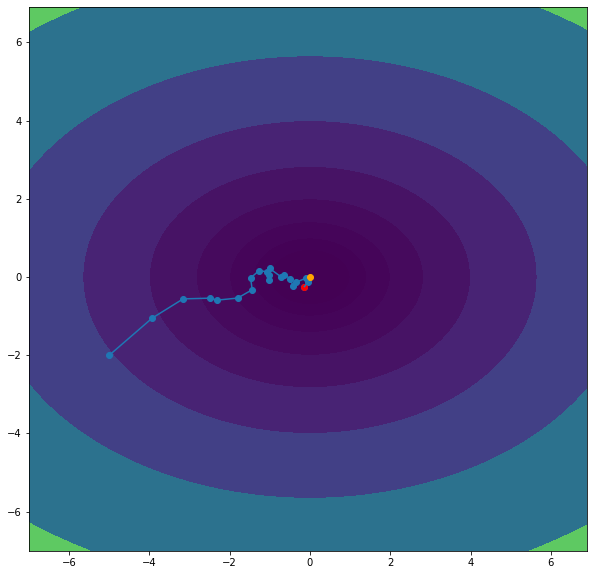

In [9]:
# Stoachastic gradient descent
lr = 0.1

# Create an array and require that its grad is attached
p = torch.tensor([-5.0, -2.0], requires_grad=True)

# Store the coordinates to plot later
x_coords = [p[0].item()]
y_coords = [p[1].item()]

# Run GD for 20 iterations, compute loss, update p with gradient times learning rate
for i in range(20):
    loss = TestFct(p)
    loss.backward()
    noise = np.random.normal(0.0, 1.6, (2,))
    with torch.no_grad():
        p -= lr * (p.grad + noise)
        p.grad.zero_()
    x_coords.append(p[0].item())
    y_coords.append(p[1].item())

plt.figure(figsize=(10, 10))
plt.contourf(X, Y, Z, levels=[0, 1, 2, 4, 8, 16, 32, 64, 128, 256])  # ,512,1024,2048])
plt.plot(x_coords, y_coords)
plt.scatter(x_coords, y_coords)
plt.scatter([0], [0], c="Orange")
plt.scatter(x_coords[-1], y_coords[-1], c="Red")  # last update

plt.show()